In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import  load_diabetes

In [2]:
df = load_diabetes()

In [3]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
# Create the DataFrame
dataset = pd.DataFrame(df.data)

In [5]:
# seprates the columns name
dataset.columns = df.feature_names

In [6]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
# independent and dependent features

X = dataset
y = df.target

In [8]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
# Now Linear Regression
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [14]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=5)

In [16]:
# final Mean sqaure error
np.mean(mse)

np.float64(-3143.015307427723)

In [17]:
# predication
reg_pred = regression.predict(X_test)

In [18]:
reg_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

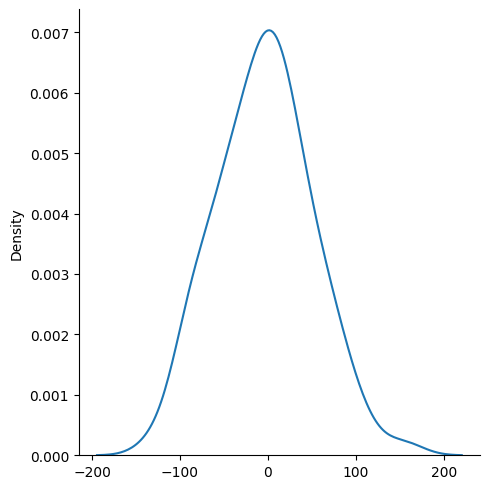

In [19]:
import seaborn as sns
sns.displot(reg_pred - y_test, kind='kde')

In [20]:
from sklearn.metrics import r2_score

In [21]:
score = r2_score(y_test, reg_pred)

In [22]:
score

0.45260276297191926

## Ridge Regression:

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
ridge_regressor = Ridge()

In [30]:
ridge_regressor

Ridge()

In [27]:
#help(Ridge)

In [31]:
parameters = {'alpha':[1,2,5,10,67,44,24,253]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 67, 44, 24, 253]},
             scoring='neg_mean_squared_error')

In [32]:
print(ridgecv.best_params_) # select the best parameter

{'alpha': 24}


In [33]:
print(ridgecv.best_score_)

-3122.4953227669744


In [34]:
 ridge_predict = ridgecv.predict(X_test)

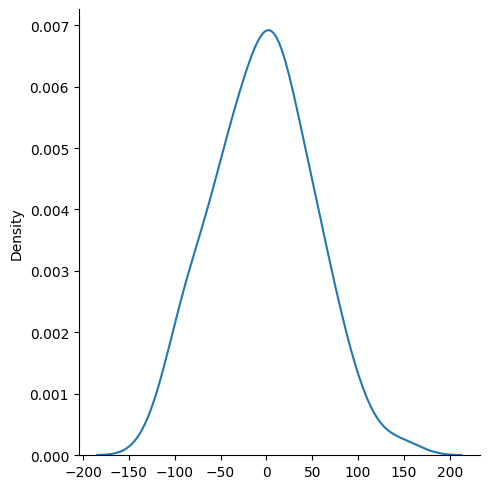

In [35]:
import seaborn as sns
sns.displot(ridge_predict - y_test, kind='kde')

In [36]:
score = r2_score(y_test, ridge_predict)

In [37]:
score

0.4591579298244106

## Lasso Regression
*   Prevent overfitting
*   Automatically Feature Selection



In [38]:
from sklearn.linear_model import Lasso

In [39]:
lasso = Lasso()

In [40]:
lasso

Lasso()

In [41]:
parameters = {'alpha':[1,2,5,10,67,44,24,253]}
lassocv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 67, 44, 24, 253]},
             scoring='neg_mean_squared_error')

In [42]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 2}
-3127.477646295573


In [43]:
 lasso_predict = lassocv.predict(X_test)

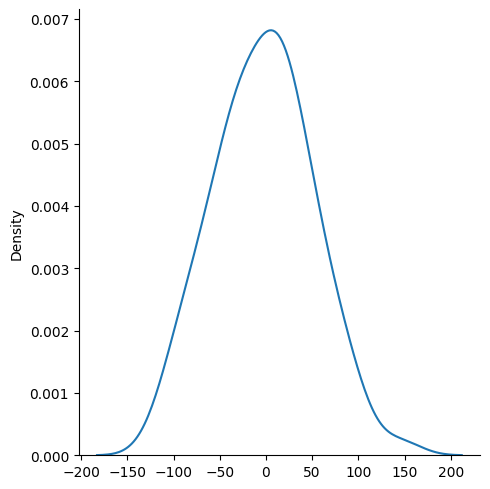

In [44]:
import seaborn as sns
sns.displot(lasso_predict - y_test, kind='kde')

In [45]:
score = r2_score(y_test, lasso_predict)

In [46]:
score

0.47173048182517374